## Importing Packages

In [1]:
import tweepy

import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as plt
import nltk

import warnings

from textblob import TextBlob
from matplotlib import pyplot as plt

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

nltk.download('stopwords')
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VSmart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Authenticate, Setting Token Acess and Instantiate API

In [47]:
consumer_key = "..."
consumer_secret = "..."
access_token = "..."
access_token_secret = "..."

In [6]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_token_secret)
api = tweepy.API(authenticate, wait_on_rate_limit=False)

## Analyzing and categorizing content from Tweets and storing in a Dictionary .

In [7]:
hashtag = "#ios16"
query = tweepy.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text,"ID":tweet.id,"Length":len(tweet.text),"Source":tweet.source,"Favourites":tweet.favorite_count,"Reweet_count":tweet.retweet_count, 'Timestamp':tweet.created_at} for tweet in query]

## Converting Dictionary into DataFrame

In [8]:
tweets = pd.DataFrame.from_dict(tweets)
tweets.head()

,Tweet,ID,Length,Source,Favourites,Reweet_count,Timestamp
0,RT @berlingonzalezs: #Tecnologia Cómo obtener ...,1566024839340691457,122,Twitter for Android,0,1,2022-09-03 11:26:31+00:00
1,Coachy is out for iOS16 beta testing #buildinp...,1566023977386008577,83,Twitter for iPhone,0,0,2022-09-03 11:23:06+00:00
2,iPhone14 Proの常時表示の詳細が明らかに ステータスバーのアイコン位置変更なども確...,1566023662313975808,136,Twitter Web App,2,1,2022-09-03 11:21:51+00:00
3,"RT @true_RICK_AQUA: How to watch Netflix ,Appl...",1566023190106804224,140,Twitter for iPhone,0,6,2022-09-03 11:19:58+00:00
4,#Tecnologia Cómo obtener el #iOS16 Beta en tu ...,1566020578171133952,101,TendenciasTech,1,1,2022-09-03 11:09:35+00:00


## Analysing the Data

In [9]:
tweets.head(10)

,Tweet,ID,Length,Source,Favourites,Reweet_count,Timestamp
0,RT @berlingonzalezs: #Tecnologia Cómo obtener ...,1566024839340691457,122,Twitter for Android,0,1,2022-09-03 11:26:31+00:00
1,Coachy is out for iOS16 beta testing #buildinp...,1566023977386008577,83,Twitter for iPhone,0,0,2022-09-03 11:23:06+00:00
2,iPhone14 Proの常時表示の詳細が明らかに ステータスバーのアイコン位置変更なども確...,1566023662313975808,136,Twitter Web App,2,1,2022-09-03 11:21:51+00:00
3,"RT @true_RICK_AQUA: How to watch Netflix ,Appl...",1566023190106804224,140,Twitter for iPhone,0,6,2022-09-03 11:19:58+00:00
4,#Tecnologia Cómo obtener el #iOS16 Beta en tu ...,1566020578171133952,101,TendenciasTech,1,1,2022-09-03 11:09:35+00:00
5,How to Unlock iPhone without Passcode &amp; wi...,1566013936419340295,143,Twitter Web App,1,0,2022-09-03 10:43:12+00:00
6,How to use Shared with You in iOS 16 and macOS...,1566011206388928512,131,Twitter Web App,0,0,2022-09-03 10:32:21+00:00
7,4 DAYS TO GO TILL APPLE EVENT 🚨🚨#AppleEvent #i...,1566010757178966017,73,Twitter Web App,3,0,2022-09-03 10:30:34+00:00
8,"Ami(e) #aveugle ou #malvoyant, désormais, dans...",1566010684810399745,138,Twitter for iPad,1,0,2022-09-03 10:30:16+00:00
9,iPhone 14 in few days……..@Apple #AppleEvent #i...,1566009271036350471,50,Twitter for iPhone,0,0,2022-09-03 10:24:39+00:00


In [10]:
tweets.shape

(1000, 7)

In [11]:
tweets.dtypes

Tweet                        object
ID                            int64
Length                        int64
Source                       object
Favourites                    int64
Reweet_count                  int64
Timestamp       datetime64[ns, UTC]
dtype: object

In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Tweet         1000 non-null   object             
 1   ID            1000 non-null   int64              
 2   Length        1000 non-null   int64              
 3   Source        1000 non-null   object             
 4   Favourites    1000 non-null   int64              
 5   Reweet_count  1000 non-null   int64              
 6   Timestamp     1000 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 54.8+ KB


In [13]:
tweets.describe(include = 'all')

,Tweet,ID,Length,Source,Favourites,Reweet_count,Timestamp
count,1000,1.000000e+03,1000.000000,1000,1000.000000,1000.000000,1000
unique,445,NaN,NaN,42,NaN,NaN,996
top,RT @xBank_Official: ---------\nSign up xBank t...,NaN,NaN,Twitter for Android,NaN,NaN,2022-09-01 16:30:00+00:00
freq,359,NaN,NaN,414,NaN,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-31 18:27:55+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-03 11:26:31+00:00
mean,NaN,1.565409e+18,125.482000,NaN,2.238000,4053.513000,NaN
std,NaN,2.675698e+14,27.590958,NaN,21.171102,5404.960732,NaN
min,NaN,1.565044e+18,6.000000,NaN,0.000000,0.000000,NaN
25%,NaN,1.565201e+18,128.000000,NaN,0.000000,1.000000,NaN


In [14]:
''' checking null values '''
tweets.isnull().sum()

Tweet           0
ID              0
Length          0
Source          0
Favourites      0
Reweet_count    0
Timestamp       0
dtype: int64

## Visualization

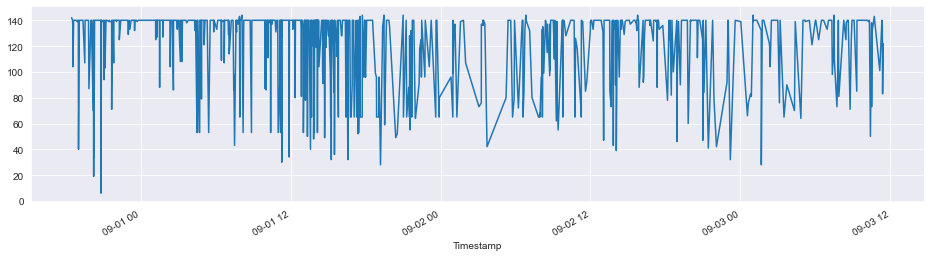

In [15]:
# Time Series
time_likes = pd.Series(data=tweets['Length'].values, index=tweets['Timestamp'])
time_likes.plot(figsize=(16, 4))
plt.show()

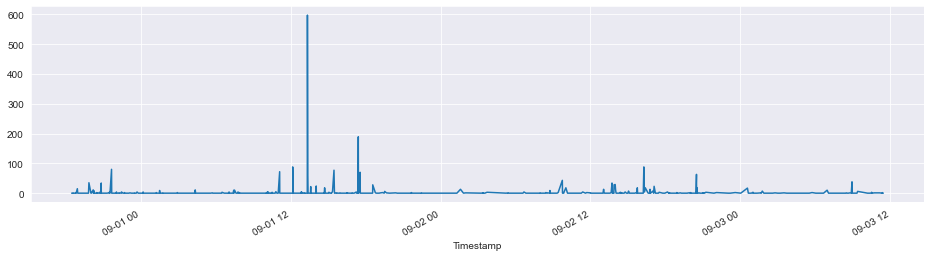

In [16]:
time_favs = pd.Series(data=tweets['Favourites'].values, index=tweets['Timestamp'])
time_favs.plot(figsize=(16, 4))
plt.show()

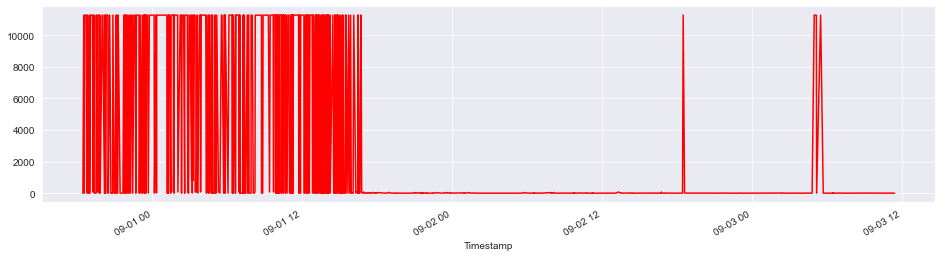

In [17]:
time_retweets = pd.Series(data=tweets['Reweet_count'].values, index=tweets['Timestamp'])
time_retweets.plot(figsize=(16, 4), color='r')
plt.show()

<AxesSubplot:xlabel='Timestamp'>

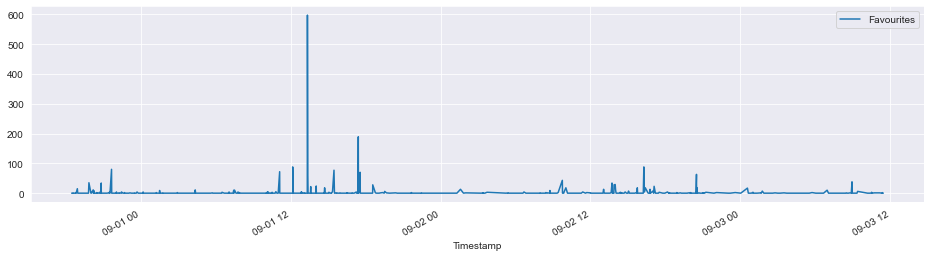

In [18]:
# Layered Time Series:
time_likes = pd.Series(data=tweets['Favourites'].values, index=tweets['Timestamp'])
time_likes.plot(figsize=(16, 4), label="Favourites", legend=True)

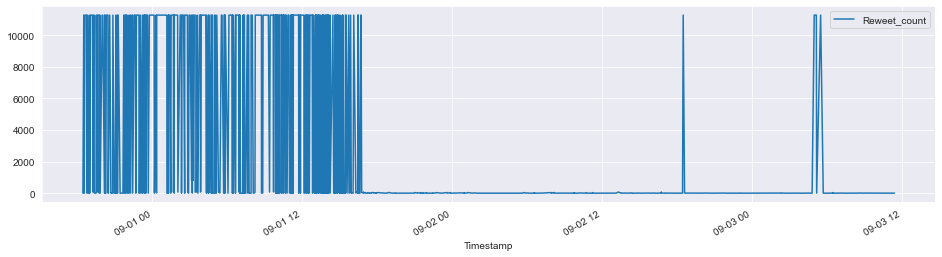

In [19]:
time_retweets = pd.Series(data=tweets['Reweet_count'].values, index=tweets['Timestamp'])
time_retweets.plot(figsize=(16, 4), label="Reweet_count", legend=True)
plt.show()

## Perform Sentiment Analysis on selected Tweets and adding into the respective Sets

In [20]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [21]:
#Perform sentiment analysis on selected tweets and adding into the respective sets
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [22]:
def analyze_senti(sentiment):
    if sentiment > 0:
        return "Positive"
    elif sentiment ==0:
        return "Neutral"
    else:
        return "Negative"

In [23]:
def analye_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

In [26]:
tweets['sentiment'] = np.array([analyze_sentiment(tweet) for tweet in tweets['Tweet']])
tweets['popularity']= np.array([analyze_senti(sentimen) for sentimen in tweets['sentiment']])
tweets['sentimentValue'] = np.array([analye_sentiment(tweet) for tweet in tweets['Tweet']])

## Exporting Datasets from DataFrame to CSV file

In [27]:
tweets.to_csv('ios16.csv')

In [29]:
tweets = pd.read_csv('ios16.csv')
tweets = tweets[['Tweet','popularity']]

In [30]:
''' checking null values '''
tweets.isnull().sum()

Tweet         0
popularity    0
dtype: int64

## Splitting dataset into train and test dataset

In [31]:
train, test = train_test_split(tweets,test_size = 0.1)
# Removing neutral sentiments from datasets
data_prep = train[train.popularity != "Neutral"]

## Separating the positive and negative data from dataset

In [32]:
train_positive = data_prep[ data_prep['popularity'] == 'Positive']
train_positive = train_positive['Tweet']
train_negative = data_prep[ data_prep['popularity'] == 'Negative']
train_negative = train_negative['Tweet']

In [33]:
#Defining a function to plot the datas in wordcloud
def wc_draw(datas, color = 'black'):
    words = ' '.join(datas)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    words = WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(words)
    plt.axis('off')
    plt.show()

## Priting the Positive words using WordCloud

 ==== Positive words ====


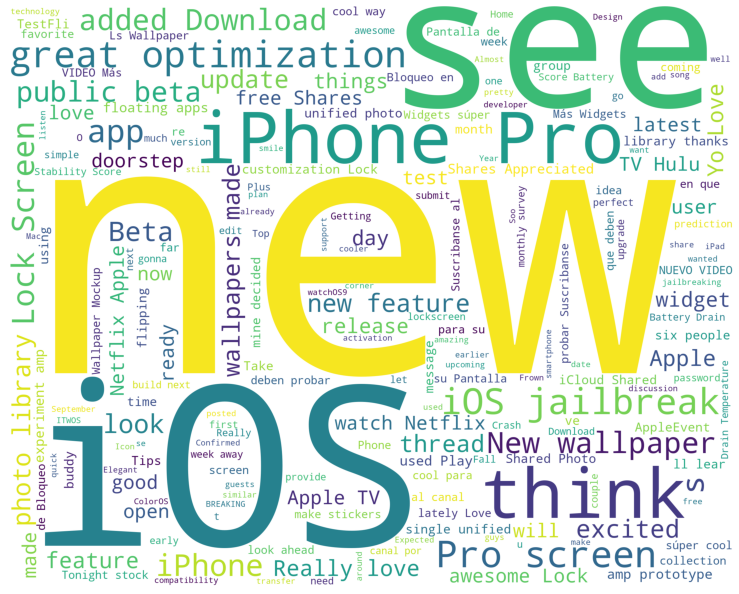

In [34]:
print(" ==== Positive words ====")
wc_draw(train_positive,'white')

## Priting the Negative words using WordCloud

====  Negative words  ====


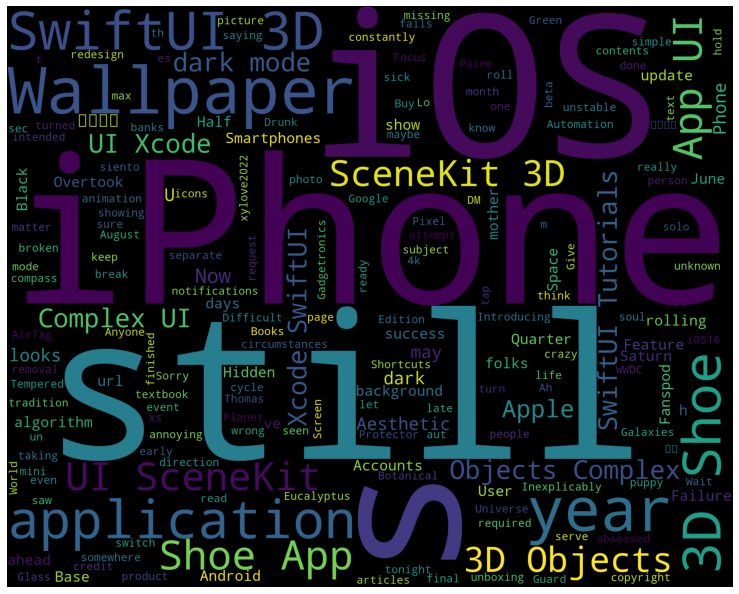

In [35]:
#plotting the negative words using wordcloud
print("====  Negative words  ====")
wc_draw(train_negative)

##  Preproecessing 

In [37]:

c = []

for i in range(0, 1000):
    ''' removing characters except a-z and A-Z'''
    r = re.sub('[^a-zA-Z]', ' ', tweets['Tweet'][i])
    ''' converting every word into lower word'''
    r = r.lower()
    ''' splitting text '''
    r = r.split()
    ''' apllying Stemming '''
    ps = PorterStemmer()
    ''' removing stopwords '''
    sw = stopwords.words('english')
    sw.remove('not')
    r = [ps.stem(word) for word in r if not word in set(sw)]
    r = ' '.join(r)
    c.append(r)

In [31]:
c

['end handbal herren championsleagu finalfour final telekomveszprem vs vivekielc thwkiel vs fcbarcelona',
 'bolsonarista kassio nune usou jatinho de um advogado q tem processo em curso stf tour custou mil e http co oulqik rk',
 'rt infamouscaveman finish within top build finish championsleagu europaleagu spot everyth',
 'rt infamouscaveman blakjokk blazedrt spideyrt promoteamgam rtsmallstream supstream promo stream wwwanpau sme rt wil',
 'blakjokk blazedrt spideyrt promoteamgam rtsmallstream supstream promo stream wwwanpau sme rt http co sjh pgz',
 'rt infamouscaveman vanessa step blazedrt spideyrt promoteamgam rtsmallstream supstream promo stream wwwanpau sme rt w',
 'vanessa step blazedrt spideyrt promoteamgam rtsmallstream supstream promo stream wwwanpau http co grouffyg',
 'mandi hale blazedrt sme rt promoteamgam rtsmallstream supstream promo stream streamersrt http co v lpldbgi',
 'skthekingyt finish within top build finish championsleagu europaleagu spo http co foszqr pmv',
 'hel

In [39]:
''' count vectorizer '''
count_vector = CountVectorizer(max_features=2500) 

''' independent and dependent variables '''
X = count_vector.fit_transform(c).toarray()
y = tweets.iloc[:, 1].values

''' checking shape '''
print(X.shape)
print(y.shape)

(1000, 1912)
(1000,)


## Random Forest Classifier

In [40]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
''' Min Max Scaler '''
min_max_sc = MinMaxScaler()

X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

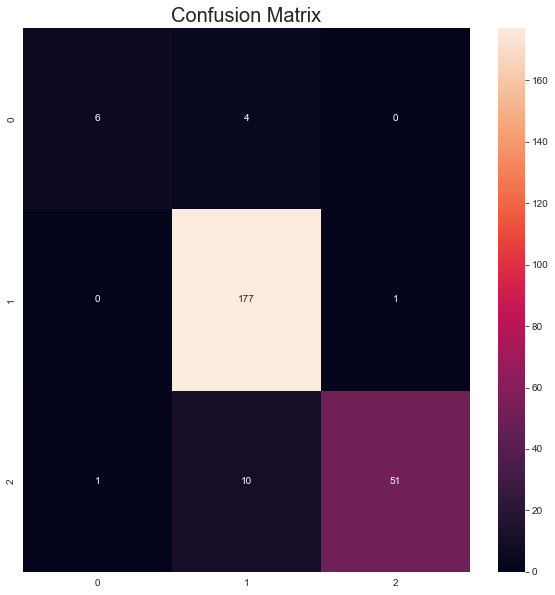

In [42]:
rf = RandomForestClassifier()

''' fit on data '''
rf.fit(X_train, y_train)

''' prediction '''
y_pred = rf.predict(X_test)

''' confusion matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20);

## Hyperparameter Tunning

In [43]:

p = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

''' Grid Search CV '''
grid_cv = GridSearchCV(estimator=rf, param_grid=p, cv=10, verbose=0, scoring='accuracy', n_jobs=-1, 
                       return_train_score=True)
grid_cv.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='accuracy')

In [44]:
print("Best Parameter : {}".format(grid_cv.best_params_))

Best Parameter : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [45]:
rf_cv = RandomForestClassifier(bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=300)

''' fit on data '''
rf_cv.fit(X_train, y_train)

''' prediction '''
pred = rf_cv.predict(X_test)

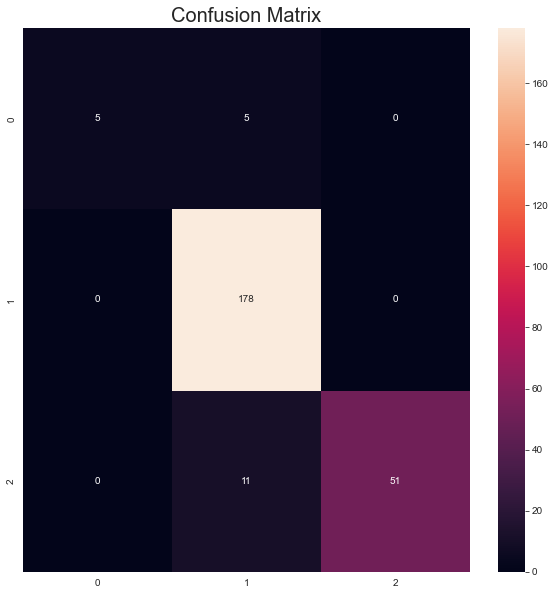

In [46]:
''' confusion matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20);